# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [10]:
# Make the codes look well structured
#nb-black package was first installed using pip install nb-black in the Jupyter terminal
%load_ext nb_black

# Libraries for data manipulation
import numpy as np
import pandas as pd

# Libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Set the parameters for the style plots
sns.set_style("dark")
# Enable the plots to stay inline,that is make plots appear in the notebook
%matplotlib inline
# Suppress any warning
import warnings

warnings.filterwarnings("ignore")
# Display all the rows of the data without limit
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
from sklearn.model_selection import train_test_split

# Build the linear regrression model
import statsmodels.api as sm

# Check the performance of the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Loading the dataset

In [ ]:
!pip install nb-black

In [246]:
df = pd.read_csv("used_device_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

## Examine the first few rows of the data 

In [7]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


<IPython.core.display.Javascript object>

## Check the number of rows and columns

In [8]:
df.shape

(3454, 15)

<IPython.core.display.Javascript object>

## Get information about the data, including data types of the columns

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Check the columns of the data 

In [15]:
df.columns.values.tolist()

['brand_name',
 'os',
 'screen_size',
 '4g',
 '5g',
 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight',
 'release_year',
 'days_used',
 'normalized_used_price',
 'normalized_new_price']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Decriptive statistics of the data

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- The average price of a new device is 5.23 euros.
- The average price of a used device is 4.36 euros.
- The maximum size of a device is 31cm.
- The average weight of a device is 182 gram.

## Check for duplicate values in the data

In [18]:
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Check if there are missing values

In [20]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Back up the original dataset so that it remains unchanged

In [23]:
df_backup = df.copy()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

## 1. Examine the distribution of normalized used device prices

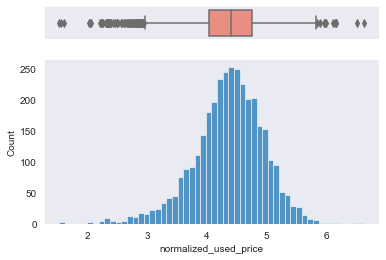

<Figure size 1080x576 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [122]:
f, (ax_box, ax_hist) = plt.subplots(
    nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.18, 0.90)},
)  # Create the two subplots
sns.boxplot(
    df["normalized_used_price"], ax=ax_box, color="salmon"
)  # Create the boxplot
sns.histplot(df["normalized_used_price"], ax=ax_hist)  # Create the histogram
ax_box.set(xlabel="")  # Suppress label for the boxplot
plt.show()

- The distribution of normalized used device prices has a bell shape, with little more values skewing to the left than to the right
- This is an indication that there are good number of used devices with cheaper prices.

## 2. Percentage of used device market dominated by Android devices

In [32]:
# Craete a dataframe for Android Devices
df_android = df[df["os"] == "Android"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
# First of all create a function for the division
def div(a, b):
    return a / b * 100

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
x = df_android["os"].count()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
y = df["os"].count()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
div(x, y)

93.05153445280834

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- Approximately 93% of the device market is dominated by Android devices.

## 3. How  the amount of RAM vary with the brand

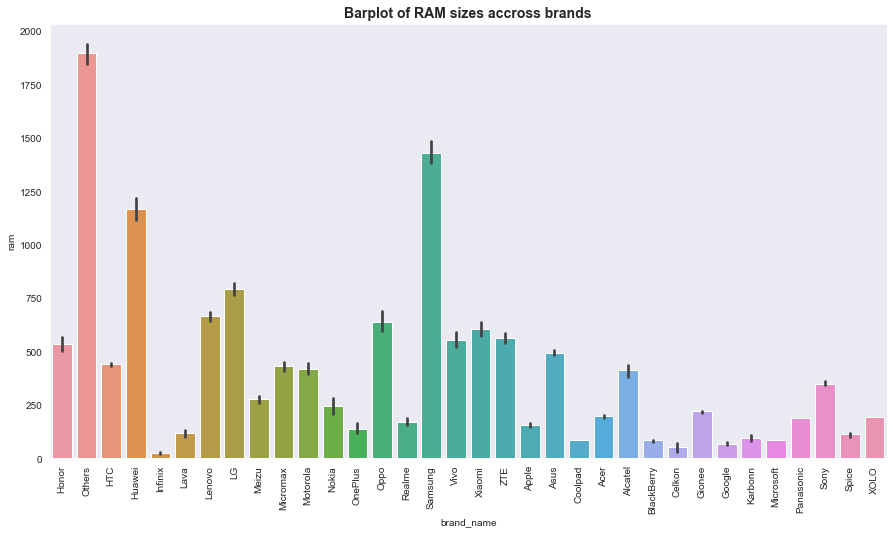

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [84]:
plt.figure(figsize=(15, 8))
plt.title(
    "Barplot of RAM sizes accross brands", fontsize=14, weight="bold",
)
sns.barplot(x="brand_name", y="ram", data=df, estimator=sum)
plt.xticks(rotation=90)
plt.show()

## 4. How weight vary for phones and tablets offering large batteries (more than 4500 mAh)

In [45]:
df_large_battery = df[df["battery"] > 4500]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

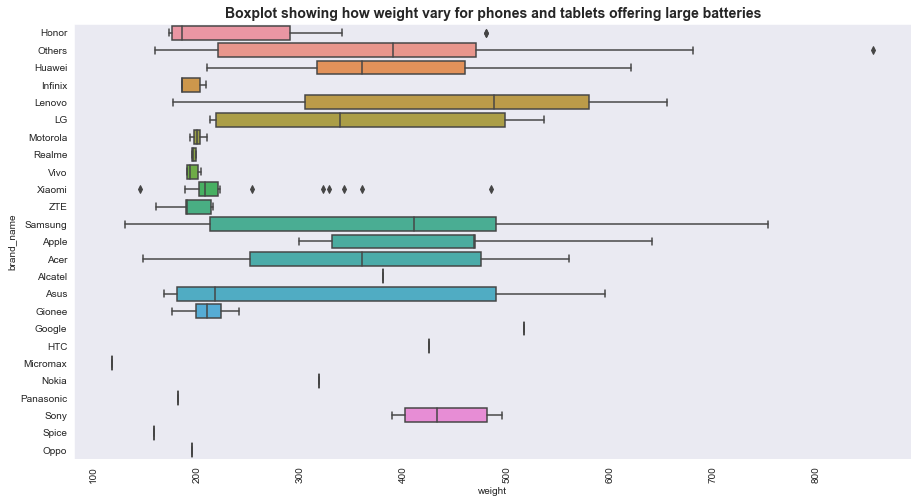

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [97]:
plt.figure(figsize=(15, 8))
plt.title(
    "Boxplot showing how weight vary for phones and tablets offering large batteries",
    fontsize=14,
    weight="bold",
)
sns.boxplot(x="weight", y="brand_name", data=df_large_battery)
plt.xticks(rotation=90)
plt.show()

## 5.  Number of phones and tablets  available across different brands with a screen size larger than 6 inches

In [53]:
df_screen_size_above_6 = df[df["screen_size"] > 6]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

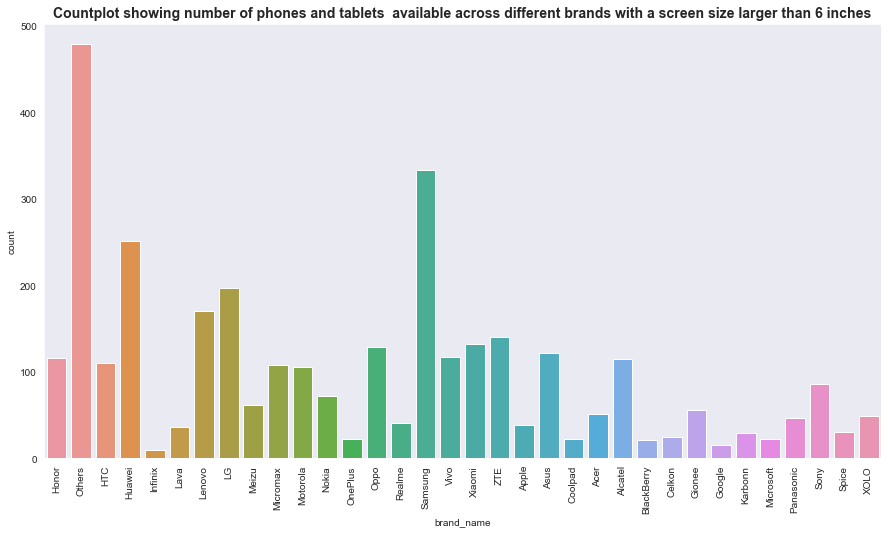

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [311]:
plt.figure(figsize=(15, 8))
plt.title(
    "Countplot showing number of phones and tablets  available across different brands with a screen size larger than 6 inches",
    fontsize=14,
    weight="bold",
)
sns.countplot(x="brand_name", data=df_screen_size_above_6)
plt.xticks(rotation=90)
plt.show()

## 6. Distribution of devices offering greater than 8MP selfie cameras across brands

In [75]:
df_selfie_camera_mp_above8 = df[df["selfie_camera_mp"] > 8]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

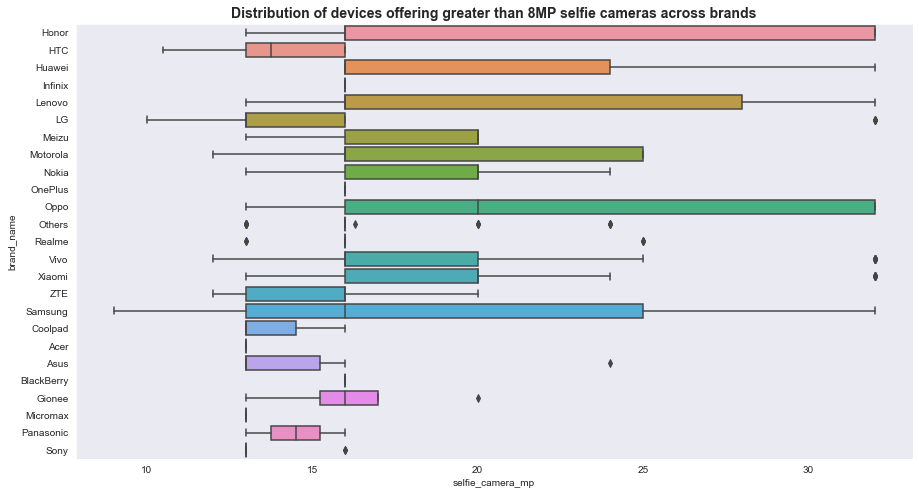

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [89]:
plt.figure(figsize=(15, 8))
plt.title(
    "Distribution of devices offering greater than 8MP selfie cameras across brands",
    fontsize=14,
    weight="bold",
)
sns.boxplot(x="selfie_camera_mp", y="brand_name", data=df_selfie_camera_mp_above8)
plt.show()

## 7. Correlation among the variables

In [78]:
# Create a list of the columns that are numeric
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Drop the release_year column since it is  not a numeric attribute
numeric_cols.remove("release_year")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

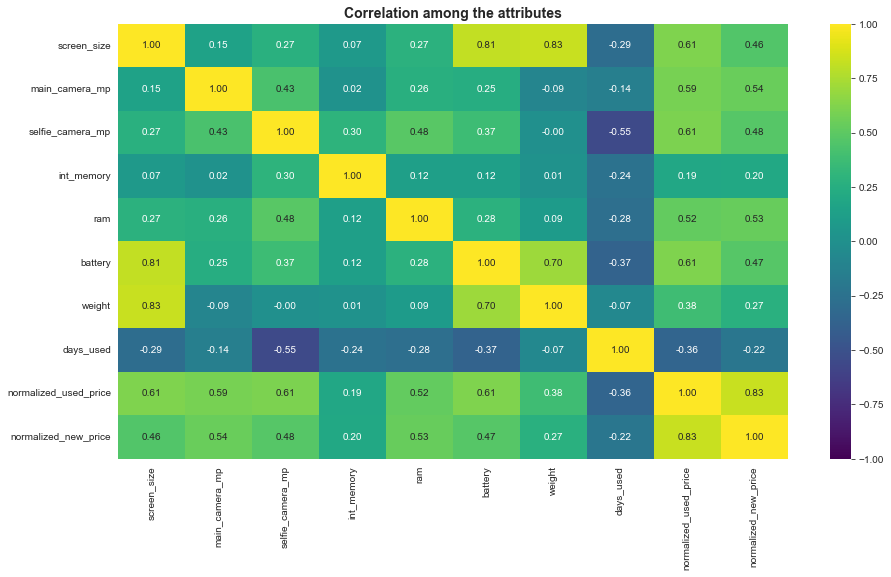

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [119]:
plt.figure(figsize=(15, 8))
plt.title(
    "Correlation among the attributes", fontsize=14, weight="bold",
)
sns.heatmap(
    df[numeric_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="viridis"
)
plt.show()

- There is generally a low correlation among the variables.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

## Dealing with missing values

In [247]:
# Create a copy of the data to prevent making any alteration to it.
df1 = df.copy()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [248]:
# Check out the columns with missing values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [249]:
# Replace the missing values with the median of each affected column
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(
    value=df1["main_camera_mp"].median()
)

df1["selfie_camera_mp"] = df1["selfie_camera_mp"].fillna(
    value=df1["selfie_camera_mp"].median()
)
df1["int_memory"] = df1["int_memory"].fillna(value=df1["int_memory"].median())

df1["ram"] = df1["ram"].fillna(value=df1["ram"].median())
df1["battery"] = df1["battery"].fillna(value=df1["battery"].median())

df1["weight"] = df1["weight"].fillna(value=df1["weight"].median())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [250]:
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Outlier Detection

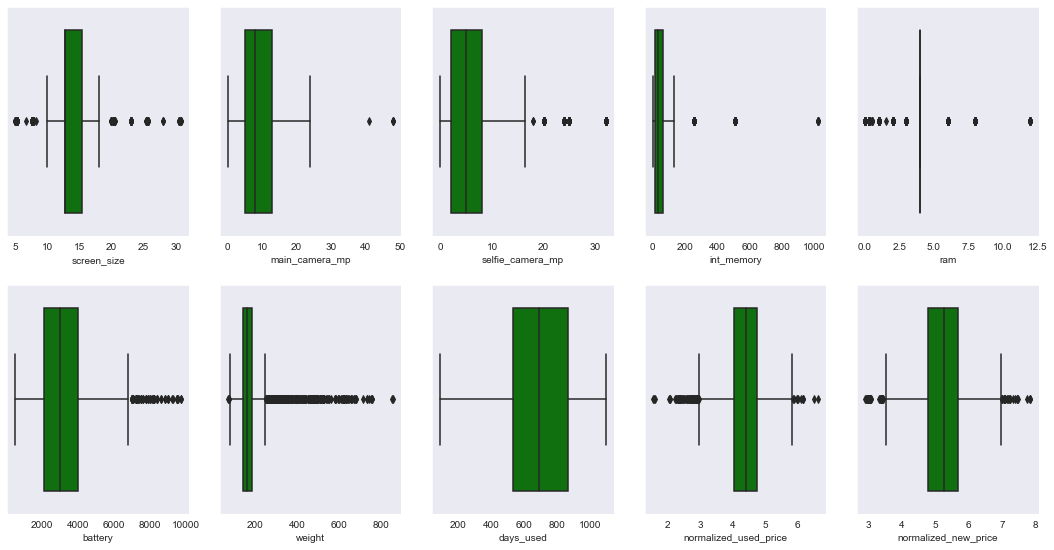

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [251]:
# outlier detection using boxplot
numeric_cols = df1.select_dtypes(include=np.number).columns.tolist()

# Drop the release_year column since it is  not a numeric attribute
numeric_cols.remove("release_year")

plt.figure(figsize=(15, 8))

for i, variable in enumerate(numeric_cols):
    plt.subplot(2, 5, i + 1)
    sns.boxplot(data=df1, x=variable, color="green")
    plt.tight_layout(pad=2)

plt.show()

* The data points lying below the lower bound and above the upper bound.
* Outliers are present in many of the olumns of this data.
* It is observed that 'days_used' does not have an outier.
* Outliers will not be treated for 'screen_size', 'battery' and 'weight'. This is because the values are expected to vary widely betweeen phones and tablets. For instance, the screen size of a tablet is expectedly bigger than that of a phone.

## Treat the Outliers using interquartile range (IQR) method 

### Using the IQR method, the data points that are outliers are removed from the following columns:
- main_camera_mp
- selfie_camera_mp
- int_memory
- normalized_used_price
- normalized_new_price

- First, we find the lower and upper bounds, then replace the values that fall outside these bounds with null values.
- This is done for each affected column using for loop.

In [252]:
for x in ["main_camera_mp"]:
    q75, q25 = np.percentile(df1.loc[:, x], [75, 25])
    iqr = q75 - q25
    max = q75 + (1.5 * iqr)
    min = q25 - (1.5 * iqr)
    df1.loc[df1[x] < min, x] = np.nan
    df1.loc[df1[x] > max, x] = np.nan

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [254]:
for x in ["selfie_camera_mp"]:
    q75, q25 = np.percentile(df1.loc[:, x], [75, 25])
    iqr = q75 - q25
    max = q75 + (1.5 * iqr)
    min = q25 - (1.5 * iqr)
    df1.loc[df1[x] < min, x] = np.nan
    df1.loc[df1[x] > max, x] = np.nan

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [255]:
for x in ["int_memory"]:
    q75, q25 = np.percentile(df1.loc[:, x], [75, 25])
    iqr = q75 - q25
    max = q75 + (1.5 * iqr)
    min = q25 - (1.5 * iqr)
    df1.loc[df1[x] < min, x] = np.nan
    df1.loc[df1[x] > max, x] = np.nan

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [256]:
for x in ["normalized_used_price"]:
    q75, q25 = np.percentile(df1.loc[:, x], [75, 25])
    iqr = q75 - q25
    max = q75 + (1.5 * iqr)
    min = q25 - (1.5 * iqr)
    df1.loc[df1[x] < min, x] = np.nan
    df1.loc[df1[x] > max, x] = np.nan

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [257]:
for x in ["normalized_new_price"]:
    q75, q25 = np.percentile(df1.loc[:, x], [75, 25])
    iqr = q75 - q25
    max = q75 + (1.5 * iqr)
    min = q25 - (1.5 * iqr)
    df1.loc[df1[x] < min, x] = np.nan
    df1.loc[df1[x] > max, x] = np.nan

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [258]:
# Now check the missing values in each column
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp             5
selfie_camera_mp         221
int_memory               138
ram                        0
battery                    0
weight                     0
release_year               0
days_used                  0
normalized_used_price     85
normalized_new_price      66
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [259]:
# Check to see no row is deleted in the process of removing outliers
df1.shape

(3454, 15)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### The removed data points are imputed with the median of ecah afftected column

In [260]:
# Replace the missing values with the median of each affected column
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(
    value=df1["main_camera_mp"].median()
)

df1["selfie_camera_mp"] = df1["selfie_camera_mp"].fillna(
    value=df1["selfie_camera_mp"].median()
)
df1["int_memory"] = df1["int_memory"].fillna(value=df1["int_memory"].median())

df1["normalized_used_price"] = df1["normalized_used_price"].fillna(value=df1["normalized_used_price"].median())

df1["normalized_new_price"] = df1["normalized_new_price"].fillna(value=df1["normalized_new_price"].median())


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [261]:
# Now check the missing values in each column after the imputation
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* The missing values have been replaced with the median values of their respective columns

In [262]:
# Check the first few rows of the data
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [263]:
# Check the last few rows of the data
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Get information about the data, including data types of the columns

In [264]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [265]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3454.0,9.328657,4.480425,0.080000,5.000000,8.000000,13.000000,24.000000
selfie_camera_mp,3454.0,5.192878,4.499633,0.000000,2.000000,5.000000,8.000000,16.300000
int_memory,3454.0,40.557380,34.384990,0.010000,16.000000,32.000000,64.000000,128.000000
ram,3454.0,4.036080,1.364314,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3454.0,3133.170961,1298.565062,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3454.0,182.705761,88.329494,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.398342,0.515903,2.961141,4.071033,4.415582,4.751951,5.820706


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [266]:
# Create a list of the columns that are numeric
numeric_cols = df1.select_dtypes(include=np.number).columns.tolist()

# Drop the release_year column since it is  not a numeric attribute
numeric_cols.remove("release_year")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

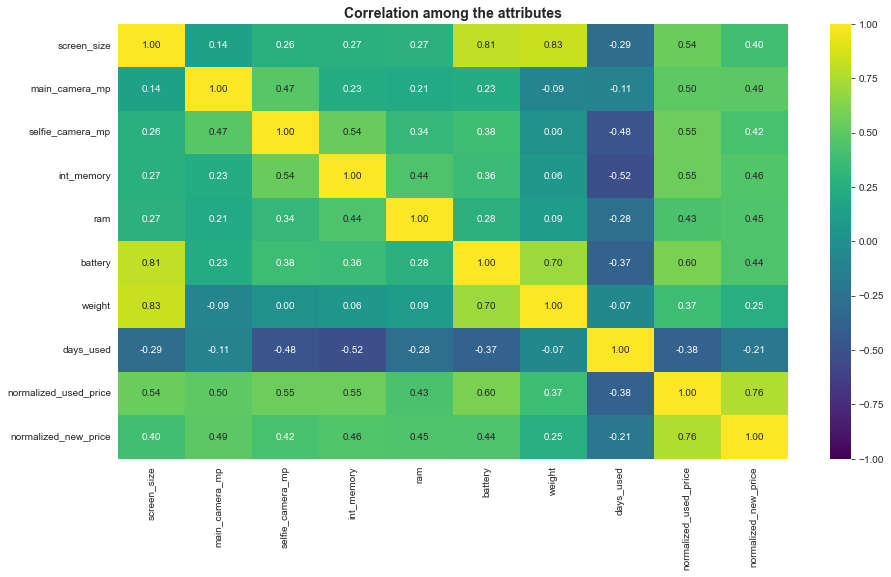

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [267]:
plt.figure(figsize=(15, 8))
plt.title(
    "Correlation among the attributes", fontsize=14, weight="bold",
)
sns.heatmap(
    df1[numeric_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="viridis"
)
plt.show()

## Prepare data for modelling

In [268]:
# Define the x and y variables
# release_year is dropped from the columns because it is not actually numeric in column
X = df1.drop(["release_year", "normalized_used_price"], axis=1)
y = df1["normalized_used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  
0              4.715100  
1              5.519018  
2              5.884631  
3              5.630961  
4              4.947837  
0    4.307572
1    5.162097
2    5.111084
3    5.1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [269]:
# Add intercept to data
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [270]:
# Create dummy variables from the object and categorical features

X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,brand_name_BlackBerry,brand_name_Celkon,brand_name_Coolpad,brand_name_Gionee,brand_name_Google,brand_name_HTC,brand_name_Honor,brand_name_Huawei,brand_name_Infinix,brand_name_Karbonn,brand_name_LG,brand_name_Lava,brand_name_Lenovo,brand_name_Meizu,brand_name_Micromax,brand_name_Microsoft,brand_name_Motorola,brand_name_Nokia,brand_name_OnePlus,brand_name_Oppo,brand_name_Others,brand_name_Panasonic,brand_name_Realme,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Split the data into train and test data. The data is split into 70:30 ratio.

In [271]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=12
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [272]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [273]:
#Check the shape of the data
df1.shape

(3454, 15)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Model Building - Linear Regression

In [274]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.760
Model:                               OLS   Adj. R-squared:                  0.755
Method:                    Least Squares   F-statistic:                     159.7
Date:                   Sun, 22 May 2022   Prob (F-statistic):               0.00
Time:                           06:57:26   Log-Likelihood:                -100.26
No. Observations:                   2417   AIC:                             296.5
Df Residuals:                       2369   BIC:                             574.5
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Interpretation of Regression Results


1. The ADjusted R-squared how good the fit of the model is. The value **Adjusted. R-squared**: It reflects the fit of the model. Its values ranges from 0 to 1.
* For this model, the value of the adjusted R-squared is 0.755, indicating a good fit for our model.
 
 2. The const coefficient is the value of the Y-intercept
 * It is the output when all the predictor variable coefficents are equal to zero. 
 * For this model, the 'const' term is 1.6867.
 3. The Coefficient of a predictor variable is the change in the output caused by a change in a predictor variable, while every other predictors are held constant.
 * For this model, the coefficient of 'main_camera_mp' for instance is 0.0229.




## Model Performance Check

In [275]:
# Function for computing adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function for computing MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function for computing different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function for computing different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # computation of R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # computation of adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # computation of compute RMSE
    mae = mean_absolute_error(target, pred)  # computation of MAE
    mape = mape_score(target, pred)  # tcomputation of MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [276]:
# check model performance on train set
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.252219,0.19142,0.760076,0.755213,4.442315


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [277]:
# check model performance on test set
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.258452,0.198666,0.750977,0.738879,4.619929


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

The following Linear Regression assumptions willl checked critically:

1. No Multicollinearity

2. Linearity of variables

3. Independence of error terms

4. Normality of error terms

5. No Heteroscedasticity

## Check for multicollinearity

* Multicollinearity occurs when the predictor variables are correlated with each other. It can lead to unreliable values for the model coefficients. 

* Multicollineairy will be checked for this model using Variance  Inflation Factor (VIF).

* The general rule of thumb for multicollinearity is:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

 ### Define a function to check VIF.

In [278]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def vif_check(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # Computing VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [236]:
vif_check(x_train)

,feature,VIF
0,screen_size,6.965142
1,main_camera_mp,2.324028
2,selfie_camera_mp,2.223084
3,int_memory,1.986381
4,ram,218.571592
5,battery,4.256956
6,weight,5.423611
7,days_used,1.875803
8,normalized_new_price,2.304019
9,brand_name_Alcatel,3.375252


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till all VIF scores is under 5.

Define a funtion to deal with this

In [279]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # Create empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [280]:
col_list = ["screen_size", "ram", "weight"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,ram,0.755304,0.254768
1,screen_size,0.751989,0.256488
2,weight,0.751444,0.256770


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [281]:
col_to_drop = "screen_size"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,201.665656
1,main_camera_mp,2.322884
2,selfie_camera_mp,2.224126
3,int_memory,2.033697
4,ram,2.150458
5,battery,3.770074
6,weight,2.986806
7,days_used,1.809281
8,normalized_new_price,2.366443
9,brand_name_Alcatel,3.379849


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Observation
- Multicollinearity is no more present in the model as the VIF now has values less than 5.

## Rebuild the model using the new set of features having dropped 'screen-size'

In [282]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.757
Model:                               OLS   Adj. R-squared:                  0.752
Method:                    Least Squares   F-statistic:                     160.2
Date:                   Sun, 22 May 2022   Prob (F-statistic):               0.00
Time:                           07:01:36   Log-Likelihood:                -117.10
No. Observations:                   2417   AIC:                             328.2
Df Residuals:                       2370   BIC:                             600.3
Df Model:                             46                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Interpretation
- P-value determines the statistical significance or otherwise of a model.
- A p-value of less than 0.05 indicates that the model is statistically significant, while a value of 0.05 or above indicates otherwise.
- There are features in the above model having p-values exceeding 0.05. 

Observation

- Adjusted  R-squared reduces from 0.755 to 0.752. This implies that the dropped 'screen_size' from the features does not have much impact on the model.
- Having dealt with multicollinearity, it is important to take a critical look at the p-values.


### Deal with high p-values

- Some of the dummy variables in the data have p-value > 0.05. So, they will be dropped since they are not significant.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
- Instead, we will:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    - Repeat the above two steps till there are no columns with p-value > 0.05

In [294]:
# list out the initial columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = np.max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'battery', 'weight', 'days_used', 'normalized_new_price', 'brand_name_Apple', 'brand_name_BlackBerry', 'brand_name_Celkon', 'brand_name_LG', 'brand_name_Realme', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [295]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [296]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.754
Model:                               OLS   Adj. R-squared:                  0.752
Method:                    Least Squares   F-statistic:                     387.0
Date:                   Sun, 22 May 2022   Prob (F-statistic):               0.00
Time:                           07:51:32   Log-Likelihood:                -129.66
No. Observations:                   2417   AIC:                             299.3
Df Residuals:                       2397   BIC:                             415.1
Df Model:                             19                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [297]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.255305,0.194669,0.754169,0.752117,4.521786


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [298]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.260588,0.198696,0.746845,0.741861,4.628005


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Observation
* All the features with p-values above 0.05 have been removed. X_train3 now contains the new features to use and olsmod2 is the final model to work with. 
* The new adjusted R-squared is 0.754, indicating that the model fitted is able to explain approximately 75% of the data. This is considered a good fit.
* Comparing the new adjusted R-squared with the one in olsmod1 (0.752) shows that the variables dropped did not impact the model so much.
* The values RMSE and MAE are comparable. This is an indication that the model is not having the problem of overfitting.

## Test for Linearity and Independence

In [299]:
# Create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
961,3.171784,3.985920,-0.814136
900,4.192076,4.338710,-0.146634
1728,4.799832,4.552357,0.247475
2998,4.151197,4.338509,-0.187311
3202,4.856474,5.284583,-0.428109


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

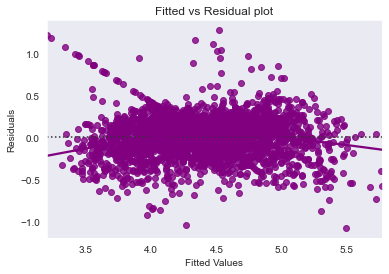

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [300]:
# Plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

Observation

* The scatter plot above plots the distribution of residuals (errors) against fitted values (predicted values).
* Presence of a pattern indicates that there is non-linearity in the model, while absence of data indicates otherwise.
* There is no definite pattern in the scatter plot, so the assumptions of linearity and independence are satisfied.

## Test for Normality

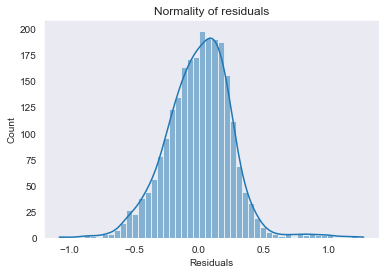

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [301]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

Observation
- The histogram of residuals does have a bell shape.


## A look at the Q-Q Plot

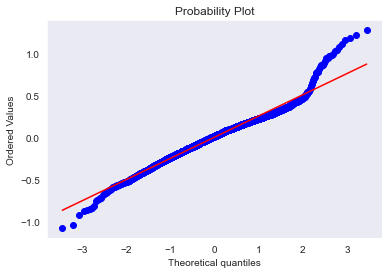

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [302]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()


- The residual follows a straight line except for the tails.


In [303]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9762494564056396, pvalue=1.2323419483876262e-19)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- The p-value obtained is less than 0.05, indicating that  the residuals are not normal.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can say the distribution as close to being normal as possible. 
- The assumption of normality is therefore satisfied.

## Test for Homoscedasticity

In [305]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.069290074464985), ('p-value', 0.12410014610789008)]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- Homoscedasticicity is a situation where the variance of the residuals is symmetrically distributed across the regression line. In other words, the variance of the residuals is constant.
- The p-value obtained from the test is 0.12, a value greater than 0.05.
- We can say that the residuals are homoscedastic. So, this assumption is satisfied.

## Prediction on the test data

In [306]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=12)

,Actual,Predicted
1502,3.993234,4.023564
3155,3.864722,3.838349
2513,4.235989,4.208150
1125,4.765417,4.731720
320,4.805577,4.630041
3197,4.837709,4.672180
591,4.720550,4.672199
478,4.560800,4.315979
3402,5.031287,5.052126
2702,4.377391,4.576357


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* The actual values and the predicted values are comparable. This is an indication that we have pretty good results from the model.

## Final Model

In [307]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [308]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.754
Model:                               OLS   Adj. R-squared:                  0.752
Method:                    Least Squares   F-statistic:                     387.0
Date:                   Sun, 22 May 2022   Prob (F-statistic):               0.00
Time:                           08:02:27   Log-Likelihood:                -129.66
No. Observations:                   2417   AIC:                             299.3
Df Residuals:                       2397   BIC:                             415.1
Df Model:                             19                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [309]:
# Check model performance on train set.
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.255305,0.194669,0.754169,0.752117,4.521786


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [310]:
# Check model performance on test set.
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.260588,0.198696,0.746845,0.741861,4.628005


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Actionable Insights and Recommendations 


1. This model explins approximately 75% of the variation in the model. 
- This is an indication that the model obtained performs well for prediction. 
- Also, the model is suitable for making inferences.

2. According to the model, a unit increase in resolution of main camera will increaase price of a used phone by 0.0224 euros, holding all other variables constant.

3. A unit increase in resolution of selfie camera will increase price of a used phone by 0.0113 euros, holding all other variables constant.

4. A unit increase in internal memory increase price of a used phone by 0.0020 euros, holding all other variables constant.

5. A unit increase in battery capacity will increase the price of a used phone by 0.00002 euros, holding all otther variables constant.
6. A unit increase in number of days the phone has been used will decrease the price of the phone by 0.0001 euros, holding all other variables constant.
7. A unit increase in the price of the phone when new will increase price of a used phone by 0.0113 units, holding all other variables constant.
8. The price of a used phone when there are no factors driving it will be 1.80 euros. 

9. Engaging in media advertising for used phones will be a good strategy for the company to improve its sales.

10. Highlighting the benefits used phones offer will help to increase the popularity of the company's products among the buyers.
11. Conducting widespread promotional sales can serve as a major boost for the sales and popularity of the used devices sold by the company.
12. The company should also ensure it understands the demography of people who spend more on gadgets, especially used ones.




___